# Exercise - Investigate High Paying Skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
# Only get Data Analysts Jobs in the UK
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg'column for accurate visualisation
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK = df_DA_UK.explode('job_skills')

df_DA_UK[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter
...,...,...
771595,111175.0,sql
771595,111175.0,excel
771595,111175.0,sheets
771595,111175.0,looker


In [37]:
df_DA_UK_group = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_UK_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_UK_group.sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

<Axes: ylabel='job_skills'>

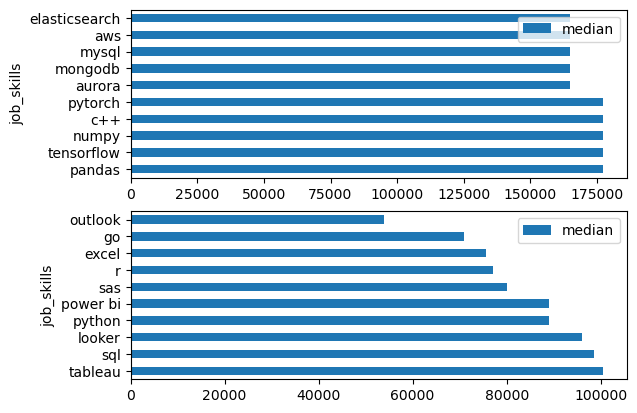

In [38]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])

df_DA_skills.plot(kind='barh', y='median', ax=ax[1])

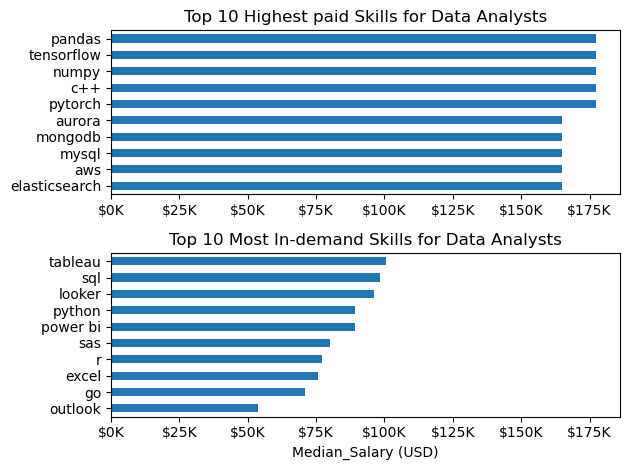

In [43]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 Highest paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))


df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlabel('Median_Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))


fig.tight_layout()